In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

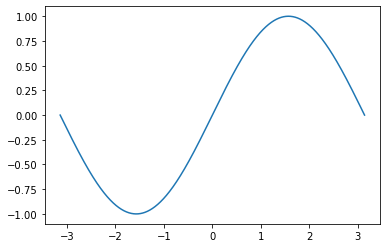

In [7]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

plt.figure()
plt.plot(x, y)

xx = x.unsqueeze(-1).pow(torch.tensor([1, 2, 3]))

y_pred:  tensor([ 11.4871,  11.4568,  11.4266,  ..., -11.9968, -12.0299, -12.0631],
       grad_fn=<ViewBackward>)


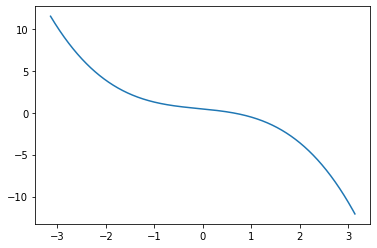

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


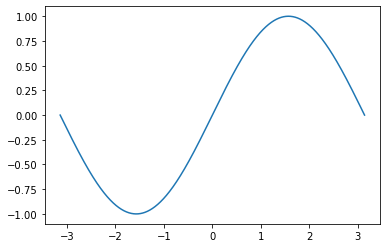

y_result:  tensor([ 11.4871,  11.4568,  11.4266,  ..., -11.9968, -12.0299, -12.0631])


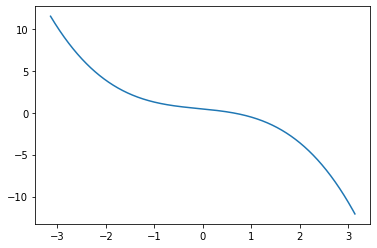

y_pred:  tensor([-0.5446, -0.5451, -0.5455,  ...,  0.2872,  0.2855,  0.2838],
       grad_fn=<ViewBackward>)


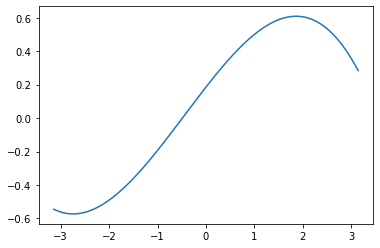

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


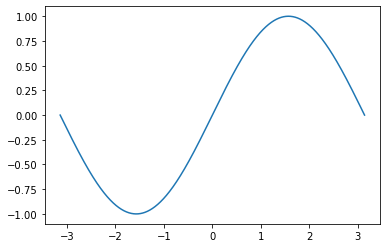

y_result:  tensor([-0.5446, -0.5451, -0.5455,  ...,  0.2872,  0.2855,  0.2838])


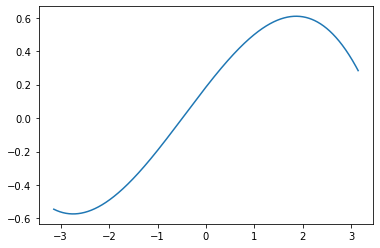

y_pred:  tensor([-0.0718, -0.0758, -0.0798,  ..., -0.0290, -0.0335, -0.0380],
       grad_fn=<ViewBackward>)


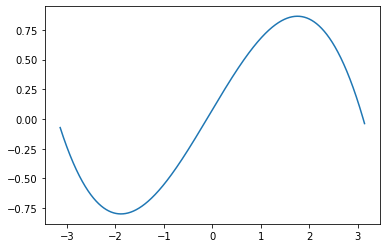

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


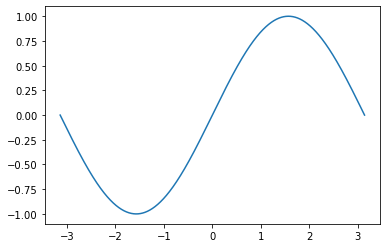

y_result:  tensor([-0.0718, -0.0758, -0.0798,  ..., -0.0290, -0.0335, -0.0380])


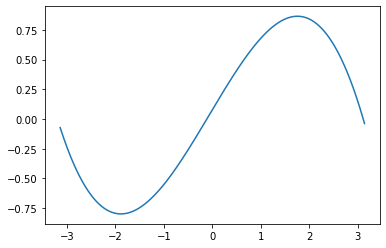

y_pred:  tensor([ 0.1012,  0.0960,  0.0907,  ..., -0.1366, -0.1420, -0.1475],
       grad_fn=<ViewBackward>)


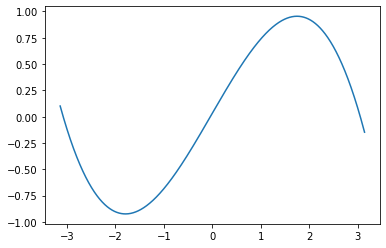

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


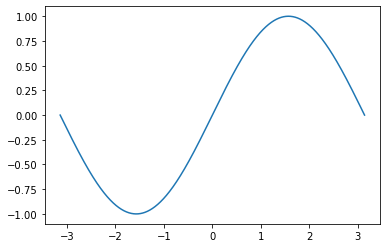

y_result:  tensor([ 0.1012,  0.0960,  0.0907,  ..., -0.1366, -0.1420, -0.1475])


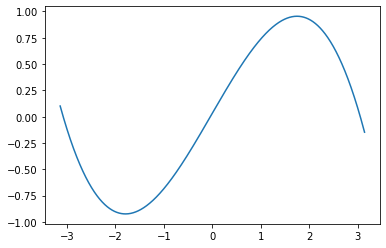

In [8]:
model = torch.nn.Sequential(
#     torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
lr = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    
    if t % 500 == 0:
        linear_layer = model[0]
        y_result = linear_layer.bias.item() + \
           linear_layer.weight[:, 0].item()*x + \
           linear_layer.weight[:, 1].item()*x**2 + \
           linear_layer.weight[:, 2].item()*x**3
        print('y_pred: ', y_pred)
        plt.figure()
        plt.plot(x, y_pred.detach().numpy())
        plt.show()
        
        print('y: ', y)
        plt.figure()
        plt.plot(x, y.detach().numpy())
        plt.show()
        
        print('y_result: ', y_result)
        plt.figure()
        plt.plot(x, y_result.detach().numpy())
        plt.show()
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

In [9]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.8349, -0.0024, -0.0902]])),
             ('0.bias', tensor([0.0139]))])

y_pred:  tensor([  6.0408,   6.0199,   5.9990,  ..., -10.6098, -10.6403, -10.6708],
       grad_fn=<ViewBackward>)


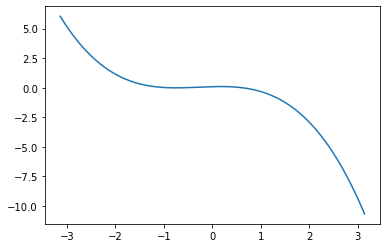

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


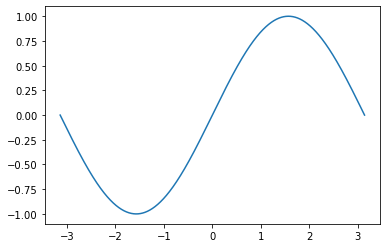

y_result:  tensor([  6.0408,   6.0199,   5.9990,  ..., -10.6098, -10.6403, -10.6708])


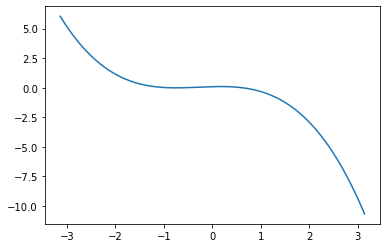

y_pred:  tensor([-0.1542, -0.1574, -0.1607,  ...,  0.0864,  0.0828,  0.0792],
       grad_fn=<ViewBackward>)


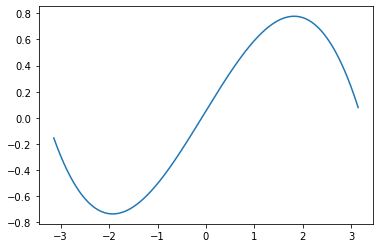

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


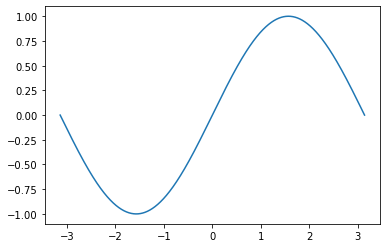

y_result:  tensor([-0.1542, -0.1574, -0.1607,  ...,  0.0864,  0.0828,  0.0792])


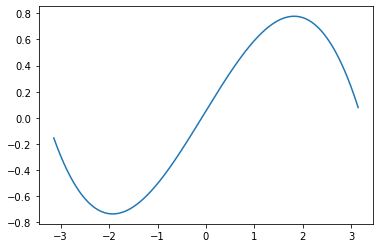

y_pred:  tensor([ 0.0731,  0.0681,  0.0631,  ..., -0.0944, -0.0995, -0.1047],
       grad_fn=<ViewBackward>)


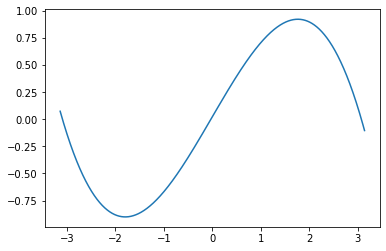

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


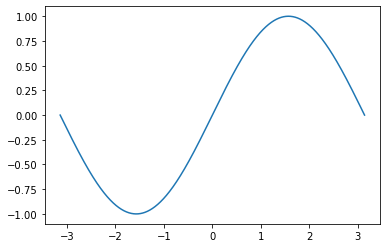

y_result:  tensor([ 0.0731,  0.0681,  0.0631,  ..., -0.0944, -0.0995, -0.1047])


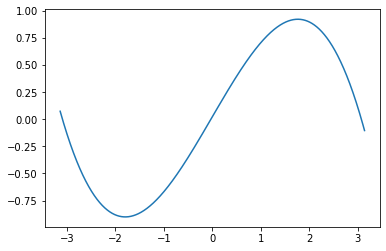

y_pred:  tensor([ 0.1553,  0.1497,  0.1441,  ..., -0.1572, -0.1629, -0.1686],
       grad_fn=<ViewBackward>)


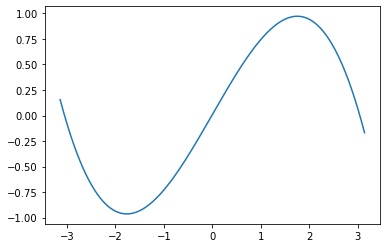

y:  tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


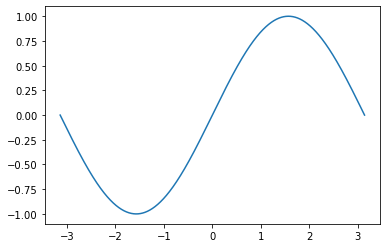

y_result:  tensor([ 0.1553,  0.1497,  0.1441,  ..., -0.1572, -0.1629, -0.1686])


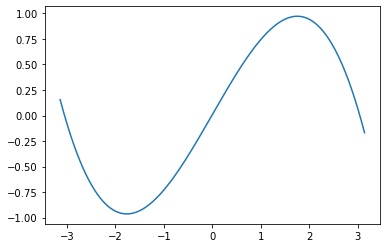

In [10]:
model = torch.nn.Sequential(
#     torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
lr = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    
    if t % 500 == 0:
        linear_layer = model[0]
        y_result = linear_layer.bias.item() + \
           linear_layer.weight[:, 0].item()*x + \
           linear_layer.weight[:, 1].item()*x**2 + \
           linear_layer.weight[:, 2].item()*x**3
        print('y_pred: ', y_pred)
        plt.figure()
        plt.plot(x, y_pred.detach().numpy())
        plt.show()
        
        print('y: ', y)
        plt.figure()
        plt.plot(x, y.detach().numpy())
        plt.show()
        
        print('y_result: ', y_result)
        plt.figure()
        plt.plot(x, y_result.detach().numpy())
        plt.show()
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

In [11]:
model.state_dict()

OrderedDict([('0.weight', tensor([[ 8.4544e-01, -6.8787e-04, -9.1723e-02]])),
             ('0.bias', tensor([0.0040]))])

In [12]:
linear_layer = model[0]
y_result = linear_layer.bias.item() + \
   linear_layer.weight[:, 0].item()*x + \
   linear_layer.weight[:, 1].item()*x**2 + \
   linear_layer.weight[:, 2].item()*x**3

In [13]:
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.0039872461929917336 + 0.8454400300979614 x + -0.0006878665299154818 x^2 + -0.09172294288873672 x^3


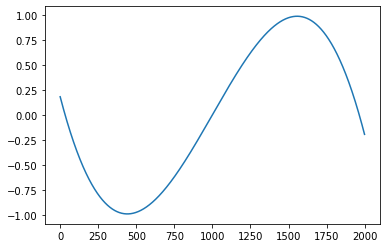

In [14]:
plt.figure()
plt.plot(y_result)

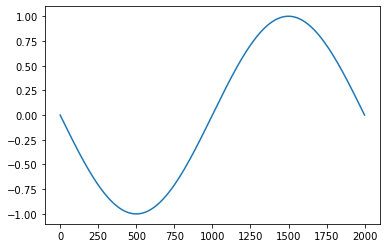

In [15]:
plt.plot(torch.sin(x))

In [ ]:
# recreate the above using two layers